# Compare historical and control runs of ISMIP6 models of Antarctica

##### Description:
This recipe recreates the analysis of Section 4.1 of Hélène Seroussi et al. 2020 (https://doi.org/10.5194/tc-14-3033-2020). 

We compare the historical simulations, ending in December 2014, and the control runs. We look at the evolution of surface mass balance, basal melt rate, and volume above floatation.

##### Written by: 
Paula Boubel, Oct 2024

##### Data requirements: 
The ISMIP6 model projections (see https://theghub.org/groups/ismip6/wiki/ISMIP6-Projections-Antarctica) available now on Gadi in /g/data/kj13/datasets/ismip6/ISMIP6-Projection-AIS

##### Python requirements: 
- Python 3
- xarray
- matplotlib
- numpy
- pandas

In [1]:
# lets import xarray and numpy
%matplotlib inline
%config InlineBackend.figure_format='retina'
import IPython.display
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import random

In [78]:
## Load utils.py from wherever it's located
%run -i "/g/data/tm70/pb9726/access-issm-cookbook/ISMIP6/utils.py"

Let's get our data

In [69]:
datapath = "/g/data/kj13/datasets/ismip6/ISMIP6-Projection-AIS" # Supply the path to the location of the ISMIP6 model data

ismip6 = AllModels(datapath) # Initialise the AllModels class, which will allow us to find, load, and combine datasets

#For this recipe we only need to load the following variables:
variables = ['acabf','libmassbfgr','libmassbffl','lithk','sftflf','sftgrf'] # Names of variables to retrieve
org_list = ['AWI','IMAU','ILTS_PIK','LSCE','NCAR','UCIJPL','ULB','VUB'] # Institutions we want to look at 

In [70]:
## Get the control runs
ctrl_data = ismip6.get_combined_models(org_list, 'ctrl_proj_std', variables)

AWI PISM1
IMAU IMAUICE1
IMAU IMAUICE2
ILTS_PIK SICOPOLIS1
LSCE GRISLI2
NCAR CISM
UCIJPL ISSM
ULB fETISh_32km
ULB fETISh_16km
VUB AISMPALEO


/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.4/lib/python3.11/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.4/lib/python3.11/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


In [71]:
## Get the historical data
hist_data = ismip6.get_combined_models(org_list, 'hist_std', variables)

AWI PISM1
IMAU IMAUICE1
IMAU IMAUICE2
ILTS_PIK SICOPOLIS1
LSCE GRISLI2
NCAR CISM
UCIJPL ISSM
ULB fETISh_32km
ULB fETISh_16km
VUB AISMPALEO


## Figure 1. 
Evolution of surface mass balance (a, in Gt yr−1), basal melt rate (b, in Gt yr−1) and volume above floatation (c, in Gt) during the historical and ctrl_proj experiments for all the simulations performed with the open and standard framework. Note the different scale on the time axis prior to 1950.

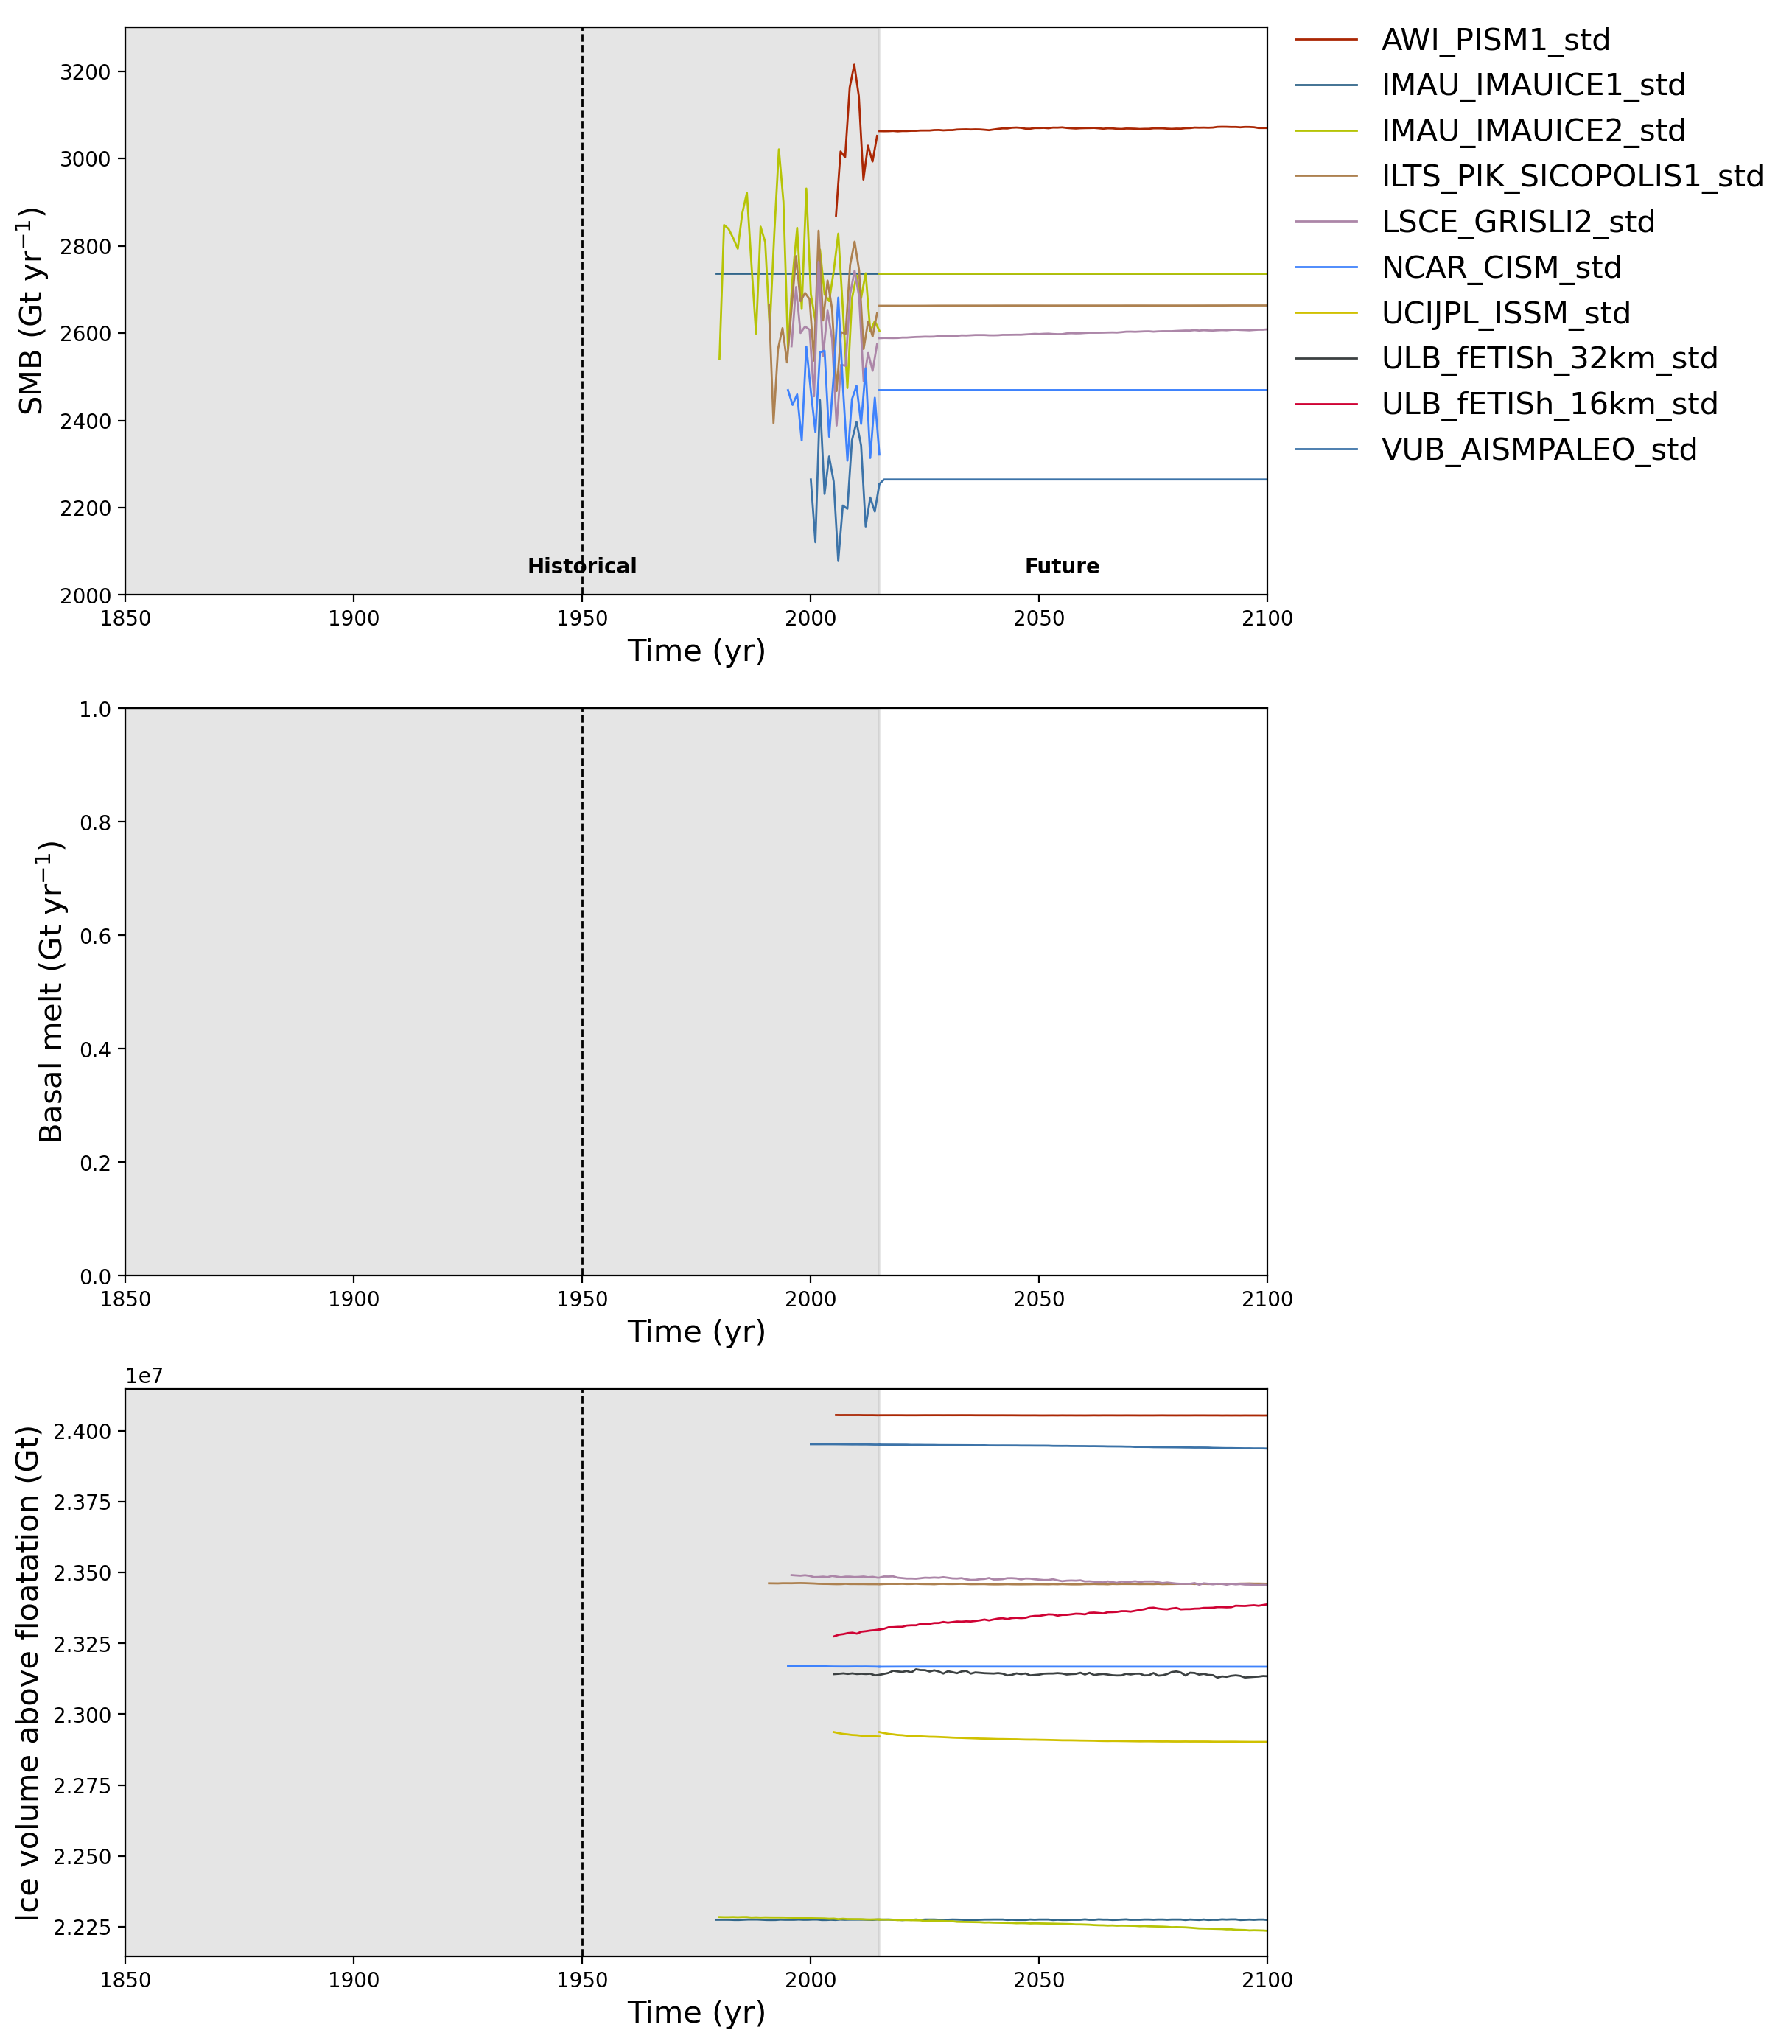

In [74]:
fig, axs = plt.subplots(nrows=3, figsize=(10,17))
num_tt = len(ctrl_data.coords['time'])

years = 2015 + np.arange(num_tt)
colors = list(mcolors.XKCD_COLORS)
random.shuffle(colors)

for i in range(len(ismip6.modellist)):
    model = ismip6.modellist[i]
    label = model.replace('/','_')+'_std'
    axs[0].plot(years, get_smb(ctrl_data.sel(model=model).acabf), label=label, color=colors[i], linewidth=1)
    hist_model = hist_data[i]
    axs[0].plot(hist_model.time, get_smb(hist_model.acabf), color=colors[i], linewidth=1)
    #axs[1].plot(years, -((get_smb(ctrl_data.sel(model=model).libmassbfgr)) + get_smb(ctrl_data.sel(model=model).libmassbffl)), color=colors[i])
    axs[2].plot(years, 1e7*get_ice_mass_area(ctrl_data.sel(model=model).lithk, fraction=ctrl_data.sel(model=model).sftgrf)[0], color=colors[i], linewidth=1)
    axs[2].plot(hist_model.time, 1e7*get_ice_mass_area(hist_model.lithk, fraction=hist_model.sftgrf)[0], color=colors[i], linewidth=1)

axs[0].legend(fontsize=15, bbox_to_anchor=(1.00, 1.05), frameon=False)
axs[0].set_ylabel(r'SMB (Gt yr$^{-1}$)', fontsize=15)
axs[0].set_ylim(2000,3300)
axs[0].text(1950,2050,'Historical',horizontalalignment='center',fontweight='bold')
axs[0].text(2055,2050,'Future',horizontalalignment='center',fontweight='bold')

axs[1].set_ylabel(r'Basal melt (Gt yr$^{-1}$)', fontsize=15)
#axs[1].set_ylim(0,4500)
#axs[1].text(1950,250,'Historical',horizontalalignment='center',fontweight='bold')
#axs[1].text(2055,250,'Future',horizontalalignment='center',fontweight='bold')

axs[2].set_ylabel(r'Ice volume above floatation (Gt)', fontsize=15)
#axs[2].set_ylim(1.98e7,2.16e7)
#axs[2].text(1950,1.99e7,'Historical',horizontalalignment='center',fontweight='bold')
#axs[2].text(2055,1.99e7,'Future',horizontalalignment='center',fontweight='bold')

for ax in axs:
    ax.axvspan(1850,2015, alpha=0.2, color='grey')
    ax.set_xlim(1850, 2100)
    ax.set_xlabel('Time (yr)', fontsize=15)
    ax.axvline(x=1950,linestyle='--',color='k',linewidth=1)

plt.savefig('figure1.png')